In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Naviance data for college applications to Pandas data frame
apps = pd.read_csv(r"C:\Users\akesli\Downloads\Applications_Class_of_2024.csv")

#Clean the data to make it ready for visualizations
apps['Type'] = apps['Type'].replace({'RD': 'Regular', 
                                     'EA': 'Early', 
                                     'ROLL': 'Regular', 
                                     'EAII': 'Early', 
                                     'ED': 'Early', 
                                     'OTHR': 'Regular', 
                                     'EDII': 'Early',
                                     'REA': 'Early',
                                     'PRI': 'Early'})

apps['Result'] = apps['Result'].replace({'Unknown': 'Accepted', 'Guar. Transfer': 'Accepted', 'Withdrawn': 'Accepted'})

#shorten some college names to get better visuals on graphs
apps['College'] = apps['College'].replace({'University of Massachusetts-Boston': 'UMASS Boston', 
                                          'University of Massachusetts-Amherst': 'UMASS Amherst', 
                                          'University of Massachusetts-Lowell': 'UMASS Lowell',
                                          'University of Massachusetts-Dartmouth': 'UMASS Dartmouth',
                                          'Salem State University': 'Salem State', 
                                          'Massachusetts College of Pharmacy and Health Sciences': 'MCPHS', 
                                          'Wentworth Institute of Technology': 'Wentworth IT', 
                                          'Tufts University': 'Tufts U', 
                                          'Boston University': 'BU', 
                                          'Boston College': 'BC', 
                                          'Northeastern University': 'Northeastern U'})



Campus            object
GPA              float64
High SAT 1600     object
College           object
Type              object
Result            object
WL                object
Defer             object
Attending         object
Flags             object
dtype: object


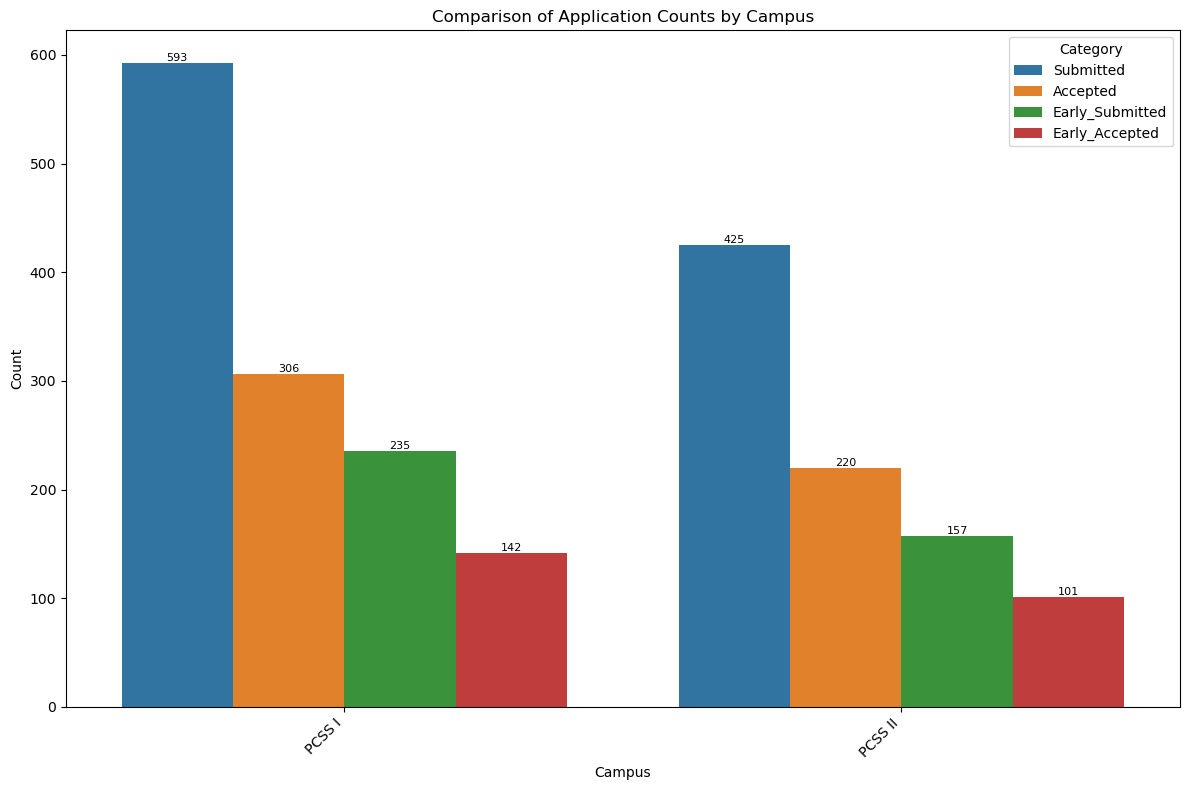

In [74]:
#Camparions between the two PCSS campuses

# Count the number of applications for each campus
submitted_apps_per_campus = apps['Campus'].value_counts()

# Filter the dataframe to include only rows where the result is 'Accepted'
accepted_apps = apps[apps['Result'] == 'Accepted']

# Count the number of 'Accepted' results for each campus
accepted_count_per_campus = accepted_apps.groupby('Campus').size()


# Filter the dataframe to include only rows where the type is early
early_apps = apps[apps['Type'] == 'Early']

# Count the number of 'Accepted' results for each campus
early_count_per_campus = early_apps.groupby('Campus').size()


# Filter the dataframe to include only rows where the result is 'Accepted'
early_accepted_apps = early_apps[early_apps['Result'] == 'Accepted']

# Count the number of 'Accepted' results for each campus
early_accepted_count_per_campus = early_accepted_apps.groupby('Campus').size()


# Combine all counts into one dataframe
comparison_df = pd.DataFrame({'Campus': submitted_apps_per_campus.index,
                              'Submitted': submitted_apps_per_campus.values,
                              'Accepted': accepted_count_per_campus.values,
                              'Early_Submitted': early_count_per_campus.values,
                              'Early_Accepted': early_accepted_count_per_campus.values
                              })

# Melt the dataframe to long format for plotting
melted_df = comparison_df.melt(id_vars='Campus', var_name='Category', value_name='Count')

# Plot the data
plt.figure(figsize=(12, 8))
comparison = sns.barplot(data=melted_df, x='Campus', y='Count', hue='Category')
plt.title('Comparison of Application Counts by Campus')
plt.xlabel('Campus')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Category')

# Add count labels on top of each bar
for idx, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, melted_df.iloc[idx]['Count'],
             ha='center', va='bottom', fontsize=8)
    
#Save the figure
fig=comparison.get_figure()
fig.savefig("Comparisons by Campus.png", bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

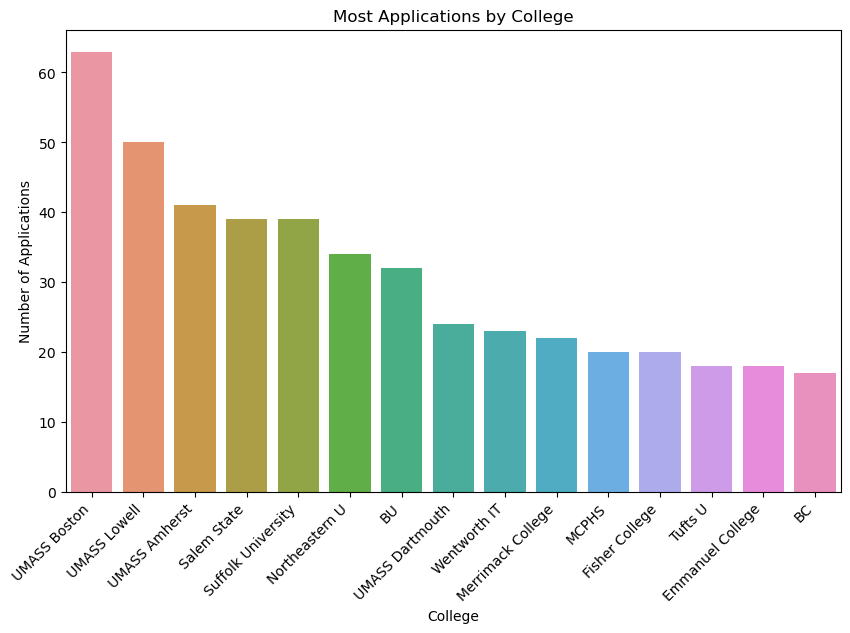

In [56]:
#Most applications by College

plt.figure(figsize=(10, 6))
apps_plot = sns.countplot(data=apps, x='College', order=apps['College'].value_counts().iloc[:15].index)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('College')
plt.ylabel('Number of Applications')
plt.title("Most Applications by College")

#save the figure
fig=apps_plot.get_figure()
fig.savefig("Most Applications by College.png", bbox_inches="tight")
plt.show()

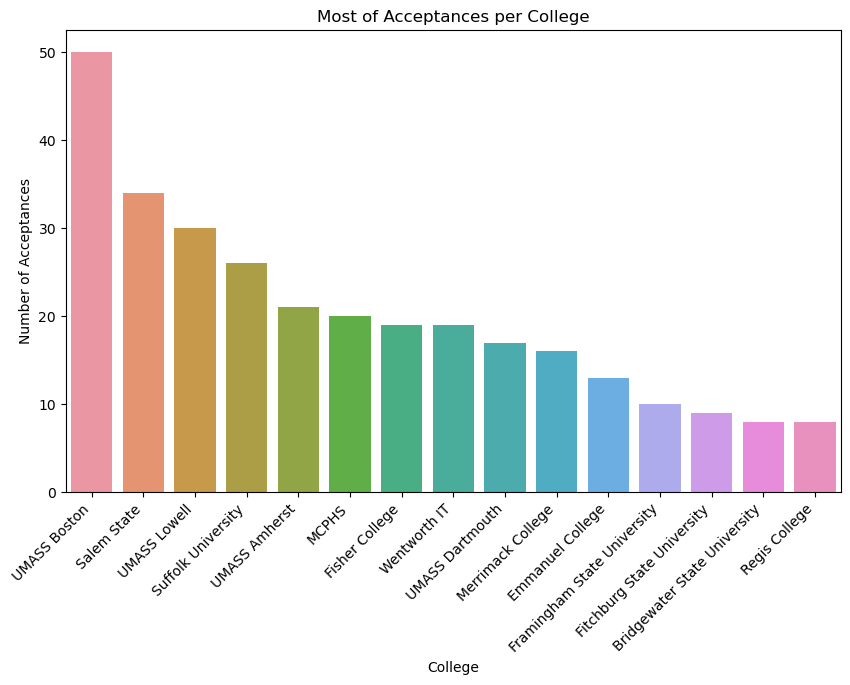

In [52]:
#Most acceptances by college 

# Filter only the rows where the result is 'Accepted'
accepted_apps = apps[apps['Result'] == 'Accepted']

# Create the count plot
plt.figure(figsize=(10, 6))
acceptance = sns.countplot(data=accepted_apps, x='College', order=accepted_apps['College'].value_counts().iloc[:15].index)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('College')
plt.ylabel('Number of Acceptances')
plt.title('Most of Acceptances per College')

#Save the figure
fig=acceptance.get_figure()
fig.savefig("Most Acceptances by College.png", bbox_inches="tight")
plt.show()
